# Daño por arma en rondas de pistolas

Bibliotecas necesarias para la ejecución

In [8]:
import pyodbc 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Definición de parámetros para la conexión con la base de datos

In [9]:
conn_str_esea = (
    r'Driver={SQL Server};'
    r'Server=localhost\MSSQLSERVER01;'
    r'Database=csgo_esea;'
    r'Trusted_Connection=yes;'
    )
cnxn = pyodbc.connect(conn_str_esea)

Definición de query de obtención de datos

In [10]:
query = "SELECT [wp],sum(hp_dmg) hp_dmg,sum(arm_dmg) arm_dmg FROM [csgo_esea].[dbo].[dmg] where wp_type = 'Pistol' and [round] in (1,16) group by wp order by hp_dmg desc"

Carga de datos en dataframes

In [11]:
data = pd.read_sql_query(query, cnxn)

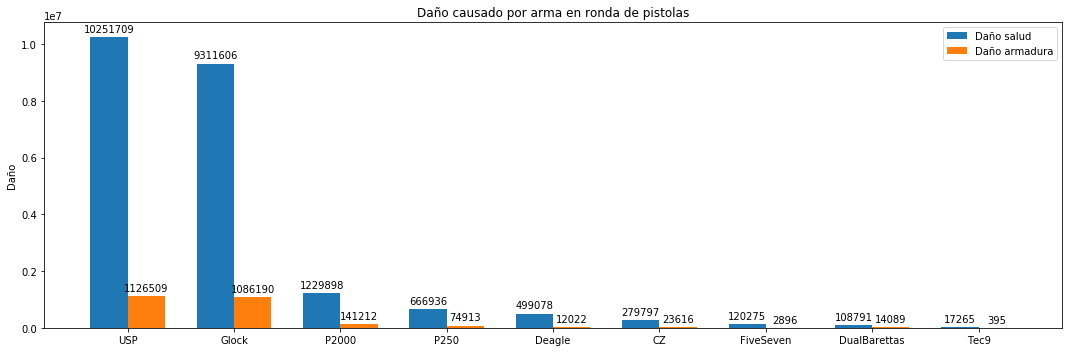

In [19]:
labels = data['wp']
hp_means = data['hp_dmg']
arm_means = data['arm_dmg']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, hp_means, width, label='Daño salud')
rects2 = ax.bar(x + width/2, arm_means, width, label='Daño armadura')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Daño')
ax.set_title('Daño causado por arma en ronda de pistolas')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()